In [1]:
import requests
import json
from flask import jsonify
from csv import writer
from statistics import mean
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as st
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6
import seaborn as sns
import sklearn
from sklearn.ensemble.forest import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import operator 
import psycopg2
import math
import requests
import json
from flask import jsonify
import csv
from csv import writer
from statistics import mean
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy import mean
from numpy import std
import statistics


C:\Users\USER\.conda\envs\DAND\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# Making csv containg number of tests

In [28]:



url = 'https://disease.sh/v2/countries'

response = requests.get(url)
lst = json.loads(response.text)

dict_name = {}
population = {}
dict_iso3 = {}
dict_noOfTests = {}
total_cases = {}
total_deaths = {}
total_recovered = {}
live_cases = {}
live_deaths = {}
live_recovered = {}
active = {}
critical = {}
casesPerOneMillion = {}
deathsPerOneMillion = {}
testsPerOneMillion = {}
recoveredPerOneMillion = {}
criticalPerOneMillion = {}
continent = {}


with open('country_populationtests.csv','w',encoding="utf-8") as csv_file:
    csv_writer = writer(csv_file)
    headers = ['Countryname', 'Countrycodeiso2', 'Countrycodeiso3','Continent','Population','Totaltests','Totalaffected','Totaldeaths','Totalrecovered','Active','Critical','Deathrate','Tests per million','Affected per million','Deaths per million','Recovered per million']
    csv_writer.writerow(headers)
    for i in lst:
        name = i['country']
        iso2 = i['countryInfo']['iso2']
        iso3 = i['countryInfo']['iso3']
        noOfTests = i['tests']
        population = i['population']
        total_cases = i['cases']
        total_deaths = i['deaths']
        total_recovered =i['recovered']
        active = i['active']
        critical = i['critical']
        casesPerOneMillion = i['casesPerOneMillion']
        deathsPerOneMillion = i['deathsPerOneMillion']
        testsPerOneMillion = i['testsPerOneMillion']
        recoveredPerOneMillion = i['recoveredPerOneMillion']
        criticalPerOneMillion = i['criticalPerOneMillion']
        continent = i['continent']
        
        entry = [name, iso2, iso3,continent,population,noOfTests,total_cases,total_deaths,total_recovered,active,critical,(total_deaths/total_cases)*100,testsPerOneMillion,casesPerOneMillion,deathsPerOneMillion,recoveredPerOneMillion]
        csv_writer.writerow(entry)
    




# Doing some data cleaning (0 deaths, <100 affected, 0 tests and tests< affected are removed

In [2]:
data = pd.read_csv('country_populationtests.csv')

In [3]:
finaldata = data[(data.Totaltests>0) & (data.Totalaffected>=100) & (data.Totaldeaths>0) & (data.Totaltests>=data.Totalaffected) ]

In [4]:
finaldata

,Countryname,Countrycodeiso2,Countrycodeiso3,Continent,Population,Totaltests,Totalaffected,Totaldeaths,Totalrecovered,Active,Critical,Deathrate,Tests per million,Affected per million,Deaths per million,Recovered per million
0,Afghanistan,AF,AFG,Asia,38841361,35923,13659,246,1259,12154,19,1.801010,925,352.0,6.0,32.41
1,Albania,AL,ALB,Europe,2878069,14269,1099,33,851,215,5,3.002730,4958,382.0,11.0,295.68
3,Andorra,AD,AND,Europe,77254,3750,764,51,684,29,4,6.675393,48541,9889.0,660.0,8853.91
7,Argentina,AR,ARG,South America,45157642,150486,14702,510,4788,9404,171,3.468916,3332,326.0,11.0,106.03
8,Armenia,AM,ARM,Asia,2962755,56042,8676,120,3297,5259,10,1.383126,18916,2928.0,41.0,1112.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Uruguay,UY,URY,South America,3472659,41469,811,22,654,135,5,2.712700,11942,234.0,6.0,188.33
208,Uzbekistan,UZ,UZB,Asia,33423219,460000,3468,14,2728,726,7,0.403691,13763,104.0,0.4,81.62
209,Venezuela,VE,VEN,South America,28442842,897695,1327,11,302,1014,4,0.828937,31561,47.0,0.4,10.62
213,Zambia,ZM,ZMB,Africa,18331278,24275,1057,7,779,271,1,0.662252,1324,58.0,0.4,42.50


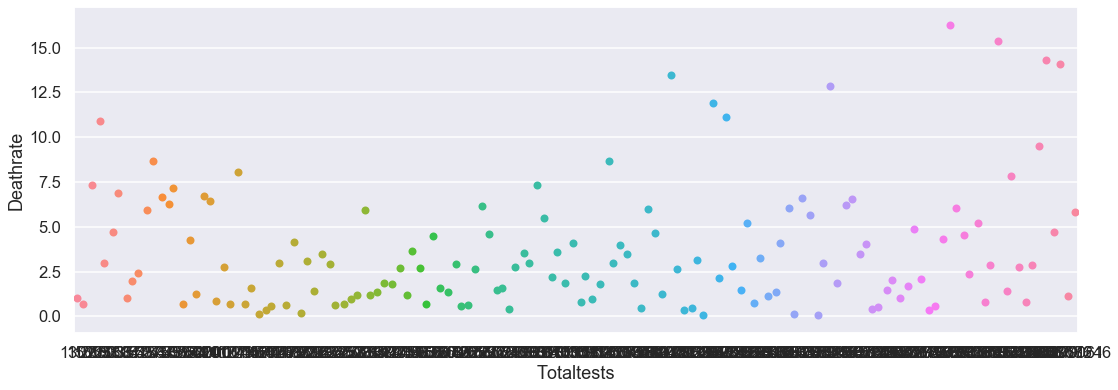

In [37]:

sns.set()
sns.set_context("talk")
#fig_dims = (20, 20)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.set_ylim(0,1750000,1000)
#plt.ylim(-1000,1750000,1000)
ax = sns.stripplot(x="Totaltests", y="Deathrate",jitter=0.25,size=8, data=finaldata)

In [5]:
header = ["Countryname", "Population", "Totaltests", "Deathrate"]
finaldata.to_csv('deathrate+tests.csv', columns = header)

In [14]:

def correl(bd):
    Bd1 = bd.iloc[:,3:4]
    Bd2 = bd.iloc[:,4:5]
    
    
    X = [x[0] for x in Bd1.values.tolist()]  #list comprehension
    Y = [y[0] for y in Bd2.values.tolist()]
    print('data1: mean=%.3f stdv=%.3f' % (mean(X), std(X)))
    print('data2: mean=%.3f stdv=%.3f' % (mean(Y), std(Y)))
    print('population test: median=%.3f' % statistics.median(X))
    print('death rate: median=%.3f' % statistics.median(Y))
    
    
    #print('my function pearson : %.5f' % pearson_def(X,Y))
    
    covariance = cov(X,Y)
    print('covarience value :')
    print( covariance)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X,y=Y,mode='markers',marker_color=Y)) # hover text goes here

    fig.update_layout(title='population test vs death rate', xaxis=dict(title='population test'),yaxis=dict(title='death rate'))
    
    fig.show()
    ##pyplot.scatter(Bd1, Bd2)
    #pyplot.xlabel("temparature")
    #pyplot.ylabel("Total Affected")
    #pyplot.show()
    alpha = 0.05 #setting my significant level 5 %
    corr, r = pearsonr(X,Y)
    print('Pearsons correlation: %.3f' % corr)
   
    
    if r > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % r)
        
    else:
        print('Samples are correlated (reject H0) p=%.3f' % r)
        
        
    corr, p = spearmanr(X,Y)
    print('Spearmans correlation: %.3f' % corr)
    
    
    # interpret the significance
    
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
       
        
    
    coef, q = kendalltau(X,Y)
    print('Kendall correlation coefficient: %.3f' % coef)
    
    # interpret the significance
    alpha = 0.05
    if q > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % q)
        
    else:
        print('Samples are correlated (reject H0) p=%.3f' % q)
        

    


In [15]:
df = pd.read_csv('deathrate+tests.csv')

correl(df)

data1: mean=552133.868 stdv=1738650.625
data2: mean=3.587 stdv=3.374
population test: median=101344.500
death rate: median=2.727
covarience value :
[[3.04404520e+12 9.29137722e+05]
 [9.29137722e+05 1.14668089e+01]]


Pearsons correlation: 0.157
Samples are uncorrelated (fail to reject H0) p=0.060
Spearmans correlation: 0.101
Samples are uncorrelated (fail to reject H0) p=0.230
Kendall correlation coefficient: 0.073
Samples are uncorrelated (fail to reject H0) p=0.192


In [9]:
pip install csvsort

Note: you may need to restart the kernel to use updated packages.


In [14]:
dataset = pd.read_csv('deathrate+tests.csv')
dataset = dataset.sort_values(["Totaltests"], ascending = (False))
dataset.to_csv('deathrate+tests.csv', index=False)
